# Jolteon: The ELAsTiCC Data Set

JOLTEON (The JOint Lensed Transient Events Observation Network) aims to bring astronomers together to develop robust methods for finding gravitationally lensed transinets with the Vera C. Rubin Observatory's Legacy Survey of Space and Time (Rubin-LSST). To develop search tools in time for Rubin-LSST, we rely on realistic simulations of transients discovered by Rubin-LSST. In particular, Jolteon uses the ELAsTiCC dataset. ELAsTiCC simulated ... .

In this notebook, we provide an introduction to the ELAsTiCC data and demonstrate how to access the ELAsTiCC light curve data from NERSC. For easiest access to this notebook and the data, we reccomend that you clone the jolteon Github repository on Perlmutter via the link: https://github.com/erinhay/jolteon.git.

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
from astropy.io import fits

from py import utils

plt.style.use('./stylesheet/style.mplstyle')

## Reading the Data

In [2]:
# Path to the ELAsTiCC directory on Perlmutter
elasticc_path = '/global/cfs/cdirs/desc-td/ELASTICC2/'

# Within this directory are folders for each transient type simulated by the ELAsTiCC dataset
# Here we print the list of directories to see what types of transients we're working with!
print(list(os.listdir(elasticc_path)))

['ELASTICC2_FINAL_SLSN-I_no_host', 'ELASTICC2_FINAL_SNIIn+HostXT_V19', 'ELASTICC2_FINAL_SL-SNIc', 'ELASTICC2_FINAL_uLens-Single-GenLens', 'ELASTICC2_FINAL_SNIcBL+HostXT_V19', 'ELASTICC2_FINAL_PISN-STELLA_HECORE', 'ELASTICC2_FINAL_ILOT', 'ELASTICC2_FINAL_SL-SNII', 'ELASTICC2_FINAL_AGN', 'ELASTICC2_FINAL_uLens-Single_PyLIMA', 'ELASTICC2_FINAL_TDE', 'ELASTICC2_FINAL_EB', 'ELASTICC2_FINAL_SLSN-I+host', 'ELASTICC2_FINAL_SNII+HostXT_V19', 'ELASTICC2_FINAL_RRL', 'ELASTICC2_FINAL_KN_B19', 'ELASTICC2_FINAL_SNII-NMF', 'ELASTICC2_FINAL_SNIa-91bg', 'ELASTICC2_FINAL_SNIb-Templates', 'ELASTICC2_FINAL_PISN-MOSFIT', 'ELASTICC2_FINAL_SNIc-Templates', 'ELASTICC2_FINAL_SNIb+HostXT_V19', 'ELASTICC2_FINAL_CART', 'ELASTICC2_FINAL_d-Sct', 'ELASTICC2_FINAL_KN_K17', 'ELASTICC2_FINAL_PISN-STELLA_HYDROGENIC', 'ELASTICC2_FINAL_SNIIb+HostXT_V19', 'ELASTICC2_FINAL_dwarf-nova', 'ELASTICC2_FINAL_uLens-Binary', 'ELASTICC2_FINAL_Mdwarf-flare', 'ELASTICC2_FINAL_SNIa-SALT3', 'ELASTICC2_FINAL_SNII-Templates', 'ELASTICC2_F

In [3]:
# We will take a look at the strongly lensed Type Ia supernovae  first
transient_type = 'SL-SN1a'

# Print a few of the files in the transient sub-directory
print(list(np.sort(os.listdir(elasticc_path + 'ELASTICC2_FINAL_' + transient_type))[0:4]))

['.ipynb_checkpoints', 'ELASTICC2_FINAL_NONIaMODEL0-0001_HEAD.FITS.gz', 'ELASTICC2_FINAL_NONIaMODEL0-0001_PHOT.FITS.gz', 'ELASTICC2_FINAL_NONIaMODEL0-0002_HEAD.FITS.gz']


In the sub-directory for each transient type, there are two sets of files: ``HEAD`` and ``PHOT`` files. The ``HEAD`` files contain metadata about each simulated object, while the ``PHOT`` files contain the photometry for the transient light curve.

Importantly, there is not a unique ``HEAD`` and ``PHOT`` file for each object. Instead, all the objects are divided (arbitrarily) among the approximately 40 sets of ``HEAD`` and ``PHOT`` files. In the ``HEAD`` file, there are two columns titled ``PTROBS_MIN`` and ``PTROBS_MAX`` which point to the index of the first and last rows of observations for that object as stored in the corresponding ``PHOT`` file.

Note that the original simulation code indexed from 1, rather than 0 like python, so you should look at rows ``PTROBS_MIN`` - 1 to ``PTROBS_MAX`` in the corresponding ``PHOT`` file to find all the photometry for a given object in a ``HEAD`` file.

In [4]:
# Choose one set of head/phot files
head_path = 'ELASTICC2_FINAL_NONIaMODEL0-0011_HEAD.FITS.gz'
phot_path = 'ELASTICC2_FINAL_NONIaMODEL0-0011_PHOT.FITS.gz'

# Read in the head/phot files using astropy
head_table = at.Table(fits.open(elasticc_path + 'ELASTICC2_FINAL_' + transient_type + '/' + head_path)[1].data)
phot_table = at.Table(fits.open(elasticc_path + 'ELASTICC2_FINAL_' + transient_type + '/' + phot_path)[1].data)

head_table

SNID,IAUC,FAKE,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,VPEC,VPEC_ERR,HOSTGAL_NMATCH,HOSTGAL_NMATCH2,HOSTGAL_OBJID,HOSTGAL_FLAG,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_SPECZ,HOSTGAL_SPECZ_ERR,HOSTGAL_RA,HOSTGAL_DEC,HOSTGAL_SNSEP,HOSTGAL_DDLR,HOSTGAL_CONFUSION,HOSTGAL_LOGMASS,HOSTGAL_LOGMASS_ERR,HOSTGAL_LOGSFR,HOSTGAL_LOGSFR_ERR,HOSTGAL_LOGsSFR,HOSTGAL_LOGsSFR_ERR,HOSTGAL_COLOR,HOSTGAL_COLOR_ERR,HOSTGAL_ELLIPTICITY,HOSTGAL_OBJID2,HOSTGAL_SQRADIUS,HOSTGAL_OBJID_UNIQUE,HOSTGAL_ZPHOT_Q000,HOSTGAL_ZPHOT_Q010,HOSTGAL_ZPHOT_Q020,HOSTGAL_ZPHOT_Q030,HOSTGAL_ZPHOT_Q040,HOSTGAL_ZPHOT_Q050,HOSTGAL_ZPHOT_Q060,HOSTGAL_ZPHOT_Q070,HOSTGAL_ZPHOT_Q080,HOSTGAL_ZPHOT_Q090,HOSTGAL_ZPHOT_Q100,HOSTGAL_MAG_u,HOSTGAL_MAG_g,HOSTGAL_MAG_r,HOSTGAL_MAG_i,HOSTGAL_MAG_z,HOSTGAL_MAG_Y,HOSTGAL_MAGERR_u,HOSTGAL_MAGERR_g,HOSTGAL_MAGERR_r,HOSTGAL_MAGERR_i,HOSTGAL_MAGERR_z,HOSTGAL_MAGERR_Y,HOSTGAL2_OBJID,HOSTGAL2_FLAG,HOSTGAL2_PHOTOZ,HOSTGAL2_PHOTOZ_ERR,HOSTGAL2_SPECZ,HOSTGAL2_SPECZ_ERR,HOSTGAL2_RA,HOSTGAL2_DEC,HOSTGAL2_SNSEP,HOSTGAL2_DDLR,HOSTGAL2_LOGMASS,HOSTGAL2_LOGMASS_ERR,HOSTGAL2_LOGSFR,HOSTGAL2_LOGSFR_ERR,HOSTGAL2_LOGsSFR,HOSTGAL2_LOGsSFR_ERR,HOSTGAL2_COLOR,HOSTGAL2_COLOR_ERR,HOSTGAL2_ELLIPTICITY,HOSTGAL2_OBJID2,HOSTGAL2_SQRADIUS,HOSTGAL2_OBJID_UNIQUE,HOSTGAL2_MAG_u,HOSTGAL2_MAG_g,HOSTGAL2_MAG_r,HOSTGAL2_MAG_i,HOSTGAL2_MAG_z,HOSTGAL2_MAG_Y,HOSTGAL2_MAGERR_u,HOSTGAL2_MAGERR_g,HOSTGAL2_MAGERR_r,HOSTGAL2_MAGERR_i,HOSTGAL2_MAGERR_z,HOSTGAL2_MAGERR_Y,HOSTGAL2_ZPHOT_Q000,HOSTGAL2_ZPHOT_Q010,HOSTGAL2_ZPHOT_Q020,HOSTGAL2_ZPHOT_Q030,HOSTGAL2_ZPHOT_Q040,HOSTGAL2_ZPHOT_Q050,HOSTGAL2_ZPHOT_Q060,HOSTGAL2_ZPHOT_Q070,HOSTGAL2_ZPHOT_Q080,HOSTGAL2_ZPHOT_Q090,HOSTGAL2_ZPHOT_Q100,HOSTGAL_SB_FLUXCAL_u,HOSTGAL_SB_FLUXCAL_g,HOSTGAL_SB_FLUXCAL_r,HOSTGAL_SB_FLUXCAL_i,HOSTGAL_SB_FLUXCAL_z,HOSTGAL_SB_FLUXCAL_Y,PEAKMJD,MJD_TRIGGER,MJD_DETECT_FIRST,MJD_DETECT_LAST,SEARCH_TYPE,SIM_MODEL_NAME,SIM_MODEL_INDEX,SIM_TYPE_INDEX,SIM_TYPE_NAME,SIM_TEMPLATE_INDEX,SIM_LIBID,SIM_NGEN_LIBID,SIM_NOBS_UNDEFINED,SIM_SEARCHEFF_MASK,SIM_REDSHIFT_HELIO,SIM_REDSHIFT_CMB,SIM_REDSHIFT_HOST,SIM_REDSHIFT_FLAG,SIM_VPEC,SIM_HOSTLIB_GALID,SIM_HOSTLIB(LOGMASS_TRUE),SIM_HOSTLIB(LOG_SFR),SIM_DLMU,SIM_LENSDMU,SIM_RA,SIM_DEC,SIM_MWEBV,SIM_PEAKMJD,SIM_MJD_EXPLODE,SIM_MAGSMEAR_COH,SIM_AV,SIM_RV,SIM_SALT2x0,SIM_SALT2x1,SIM_SALT2c,SIM_SALT2mB,SIM_SALT2alpha,SIM_SALT2beta,SIM_SALT2gammaDM,SIM_PEAKMAG_u,SIM_PEAKMAG_g,SIM_PEAKMAG_r,SIM_PEAKMAG_i,SIM_PEAKMAG_z,SIM_PEAKMAG_Y,SIM_EXPOSURE_u,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_GALFRAC_u,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_GALFRAC_Y,SIM_STRONGLENS_IDLENS,SIM_STRONGLENS_GALID,SIM_STRONGLENS_z,SIM_STRONGLENS_TDELAY,SIM_STRONGLENS_MAGSHIFT,SIM_STRONGLENS_NIMG,SIM_STRONGLENS_IMGNUM,SIM_STRONGLENS_MINSEP,SIM_STRONGLENS_LOGMASS,SIM_STRONGLENS_LOGMASS_ERR,SIM_SUBSAMPLE_INDEX
str16,str16,int16,float64,float64,float32,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,str32,int16,int16,str8,int32,int32,int32,int32,int32,float32,float32,float32,int16,float32,int64,float32,fl

In [7]:
phot_table[0:5]

MJD,BAND,CCDNUM,FIELD,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,PSF_SIG2,PSF_RATIO,SKY_SIG,SKY_SIG_T,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,XPIX,YPIX,SIM_MAGOBS
float64,str2,int16,str12,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
60897.3102,Y,-9,VOID,0,-9.0,42.404,35.86738,2.08,0.0,0.0,47.32,0.0,0.25,30.04,0.005,1.0,-9.0,-9.0,99.0
60897.3332,Y,-9,VOID,0,-9.0,7.5538936,30.526615,1.8,0.0,0.0,46.94,0.0,0.25,30.05,0.005,1.0,-9.0,-9.0,99.0
60902.3892,z,-9,VOID,0,-9.0,-7.0747514,15.509055,2.24,0.0,0.0,45.34,0.0,0.25,30.98,0.005,1.0,-9.0,-9.0,99.0
60909.4073,i,-9,VOID,0,-9.0,5.5268016,6.725399,1.71,0.0,0.0,32.26,0.0,0.25,31.29,0.005,1.0,-9.0,-9.0,99.0
60909.4194,z,-9,VOID,0,-9.0,-6.7225833,12.514527,1.7,0.0,0.0,48.41,0.0,0.25,30.99,0.005,1.0,-9.0,-9.0,99.0


In [5]:
# Let's choose one of these objects to look at more closely
index = 0
snid = int(head_table[index]['SNID'].split(' ')[0])

# Pull the row indexes in the phot file that correspond to this object from the head file PTROBS_MIN and PTROBS_MAX columns
min_row = head_table[index]['PTROBS_MIN'] - 1
max_row = head_table[index]['PTROBS_MAX']

# Pull the photometry for this object from the full phot file
photometry = phot_table[min_row:max_row]
print('SN', snid, ': rows ', min_row, ' to ', max_row)

SN 48364257 : rows  0  to  166


## Plotting Light Curves

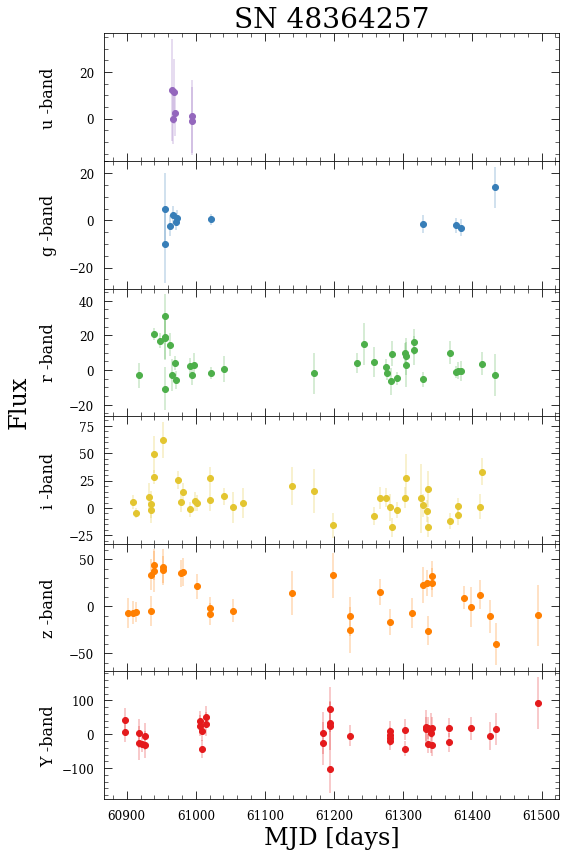

In [6]:
# Plot the light curve for this object by passing the snid and photometry to the utils.plot_lightcurve function
fig, ax = utils.plot_lightcurve(snid, photometry)

## Other Important Metadata

There is a lot of other important information stored in the ``HEAD`` file that may be of interest to us. For the glSNe, information about the true lensing system parameters, such as the time delay, source and lens redshifts, and number of images, can be found in this table. It's worth spending some time exploring the information available about the glSNe systems!

Importantly, the strong lensing systems (referring of all multiple images) are uniquely traced via the ``SIM_STRONGLENS_IDLENS`` column in the ``HEAD`` file. The true simulation parameters for the strong lensing systems are contained in a file with the extension ``.SL``. We will read this file in below for reference. The ``IDLENS`` identifier can be used to match between the 2-4 alerts in the ``HEAD`` file and the one strong lensing system in the ``.SL`` file.

More information about how the glSNe were simulated can be found in this note from Rick Kessler and Justin Pierel: https://portal.nersc.gov/cfs/lsst/DESC_TD_PUBLIC/ELASTICC/StrongLens_forELASTICC.pdf.

In [7]:
# Print some relevant information about the system

print('Strong Lensing System ID: ', head_table[index]['SIM_STRONGLENS_IDLENS'])
print('Time Delay: ', head_table[index]['SIM_STRONGLENS_TDELAY'])
print('Source Redshift: ', head_table[index]['SIM_REDSHIFT_CMB'])

Strong Lensing System ID:  520504
Time Delay:  0.0
Source Redshift:  0.9426725


In [8]:
# Read in the truths table
glSNeIa_truths = at.Table.read(elasticc_path+ 'ELASTICC2_FINAL_' + transient_type + '/ELASTICC2_FINAL_' + transient_type + '.SL', format='ascii')

# Print information about the strong lensing system of the object plotted above!
glSNeIa_truths[glSNeIa_truths['IDLENS'] == head_table[index]['SIM_STRONGLENS_IDLENS']]

VARNAMES:,ROW,GENTYPE,zSRC,PEAKMJD,IDLENS,zLENS,NIMG_GEN,NIMG_ACC,MINSEP,TDELAY_0,TDELAY_1,TDELAY_2,TDELAY_3,MAGNFIF_0,MAGNFIF_1,MAGNFIF_2,MAGNFIF_3,CID_0,CID_1,CID_2,CID_3
str4,int64,int64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
ROW:,1176,71,0.943,60971,520504,0.196,2,2,2.7,0.0,19.25,0.0,0.0,1.617,2.161,0.0,0.0,48364257,87173607,-9,-9
ROW:,1395,71,0.937,61549,520504,0.196,2,1,2.7,0.0,19.25,0.0,0.0,1.617,2.161,0.0,0.0,-9,18884235,-9,-9
